## Load data

In [1]:
import json

with open("../Services/data/input/k_fold_1/train.json", 'r') as f:
    list_of_train = json.load(f)
    
with open("../Services/data/input/k_fold_1/val.json", 'r') as f:
    list_of_val = json.load(f)
    
with open("../Services/data/input/k_fold_1/test.json", 'r') as f:
    list_of_test = json.load(f)

##  Prepare data KPIs only

In [15]:
import numpy as np

X_train = []
y_train = []

X_val = []
y_val = []

for sample in list_of_train:
    X_train.append(np.array(sample["kpis_only_features_scaled_min_max"]))
    y_train.append(np.array(sample["percentage_change_robust"]))
    
for sample in list_of_val:
    X_val.append(np.array(sample["kpis_only_features_scaled_min_max"]))
    y_val.append(np.array(sample["percentage_change_robust"]))
    
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

## Prepare data KPIs and median

In [16]:
import numpy as np

X_train = []
y_train = []

X_val = []
y_val = []

for sample in list_of_train:
    X_train.append(np.array(sample["kpis_median_features_scaled_robust"]))
    y_train.append(np.array(sample["percentage_change_robust"]))
    
for sample in list_of_val:
    X_val.append(np.array(sample["kpis_median_features_scaled_robust"]))
    y_val.append(np.array(sample["percentage_change_robust"]))
    
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

## Prepare engineered features

In [32]:
import numpy as np

X_train = []
y_train = []

X_val = []
y_val = []

for sample in list_of_train:
    X_train.append(np.array(sample["engineered_features_scaled_robust"]))
    y_train.append(np.array(sample["percentage_change_robust"]))
    
for sample in list_of_val:
    X_val.append(np.array(sample["engineered_features_scaled_robust"]))
    y_val.append(np.array(sample["percentage_change_robust"]))
    
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

## Prepare engineered features without normalization

In [ ]:
import pandas as pd

dict_of_feautures_names = {"fundamental_data_diff_self_t_1": "self_t_1",
                    "fundamental_data_diff_self_t_2": "self_t_2",
                    "fundamental_data_diff_industry_t": "ind_t",
                    "fundamental_data_diff_industry_t_1": "ind_t_1",
                    "fundamental_data_diff_industry_t_2": "ind_t_2"}

X_train_df = pd.DataFrame()
y_train_df = pd.DataFrame()
kpis_names = list(list_of_train[0]["fundamental_data_diff_self_t_1"].keys())

list_of_features_to_use = ["net_profit_margin_self_t_1",
"ev_revenue_self_t_1",
"roa_self_t_2",
"roce_self_t_2",
"operating_cash_flow_self_t_2",
"ev_revenue_self_t_2",
"roa_ind_t",
"debt_to_equity_ind_t",
"equity_ind_t",
"cash_ind_t",
"ev_ebit_ind_t",
"operating_profit_margin_ind_t_1",
"ev_revenue_ind_t_1",
"roa_ind_t_2",
"roce_ind_t_2",
"net_profit_margin_ind_t_2",
"debt_to_equity_ind_t_2",
"times_interest_earned_ind_t_2",
"price_to_earnings_ind_t_2",
"ev_ebitda_ind_t_2",
"ev_ebit_ind_t_2",
"ev_revenue_ind_t_2",
"filing_on_time_1"]

for sample in list_of_train:
    new_row = {}
    for feature in dict_of_feautures_names.keys():
        for kpi_name in kpis_names:
            if kpi_name + '_' + dict_of_feautures_names[feature] in list_of_features_to_use:
                new_row[kpi_name + '_' + dict_of_feautures_names[feature]] = sample[feature][kpi_name]

    # add is filing on time
    if sample["is_filing_on_time"]:
        new_row["filing_on_time_0"] = 0
        new_row["filing_on_time_1"] = 1
    else:
        new_row["filing_on_time_0"] = 1
        new_row["filing_on_time_1"] = 0
        
    X_train_df = X_train_df.append(new_row, ignore_index=True)
    y_train_df = y_train_df.append({"label": sample["percentage_change_robust"]}, ignore_index=True)
    
for sample in list_of_val:
    new_row = {}
    for feature in dict_of_feautures_names.keys():
        for kpi_name in kpis_names:
            if kpi_name + '_' + dict_of_feautures_names[feature] in list_of_features_to_use:
                new_row[kpi_name + '_' + dict_of_feautures_names[feature]] = sample[feature][kpi_name]

    # add is filing on time
    if sample["is_filing_on_time"]:
        new_row["filing_on_time_0"] = 0
        new_row["filing_on_time_1"] = 1
    else:
        new_row["filing_on_time_0"] = 1
        new_row["filing_on_time_1"] = 0
        
    X_train_df = X_train_df.append(new_row, ignore_index=True)
    y_train_df = y_train_df.append({"label": sample["percentage_change_robust"]}, ignore_index=True)
    

X_test_df = pd.DataFrame()
y_test_df = pd.DataFrame()

for sample in list_of_test:
    new_row = {}
    for feature in dict_of_feautures_names.keys():
        for kpi_name in kpis_names:
            if kpi_name + '_' + dict_of_feautures_names[feature] in list_of_features_to_use:
                new_row[kpi_name + '_' + dict_of_feautures_names[feature]] = sample[feature][kpi_name]

    # add is filing on time
    if sample["is_filing_on_time"]:
        new_row["filing_on_time_0"] = 0
        new_row["filing_on_time_1"] = 1
    else:
        new_row["filing_on_time_0"] = 1
        new_row["filing_on_time_1"] = 0
        
    X_test_df = X_test_df.append(new_row, ignore_index=True)
    y_test_df = y_test_df.append({"label": sample["percentage_change_robust"]}, ignore_index=True)

In [63]:
X_train_df.to_csv("data/dataframes/X_train_df_final_features.csv", index=False)
y_train_df.to_csv("data/dataframes/y_train_df_final_features.csv", index=False)
X_test_df.to_csv("data/dataframes/X_test_df_final_features.csv", index=False)
y_test_df.to_csv("data/dataframes/y_test_df_final_features.csv", index=False)

In [9]:
import pandas as pd
# Load features from CSV

X_train_df = pd.read_csv("data/dataframes/X_train_df.csv")
y_train_df = pd.read_csv("data/dataframes/y_train_df.csv")
X_test_df = pd.read_csv("data/dataframes/X_test_df.csv")
y_test_df = pd.read_csv("data/dataframes/y_test_df.csv")

## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_squared_error

clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)

print("Results for Ridge Regression:")
print(f"R_squared: {clf.score(X_train, y_train)}")
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
print(f"Mean squared error on train: {mean_squared_error(y_train, y_train_pred)}")
print(f"Mean squared error on val: {mean_squared_error(y_val, y_val_pred)}")

Results for Ridge Regression:
R_squared: 0.14427617190254127
Mean squared error on train: 1.0968004349319582
Mean squared error on val: 1.8170461573658148


In [34]:
y_val_pred[:10]

array([-0.03531921,  0.40087245,  0.22459173, -0.13602745, -0.28336639,
        0.25774636, -0.15232862, -0.04462495,  0.26402869,  0.05391955])

In [35]:
y_val[:10]

array([-1.92139441,  3.83197706,  0.67258588, -0.1203662 , -0.78714078,
       -1.37008591, -1.75305487,  0.09061102, -0.96082673, -0.23815542])

In [36]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

clf = LinearRegression()
clf.fit(X_train,y_train)

print("Results for Linear Regression:")
print(f"R_squared: {clf.score(X_train, y_train)}")
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
print(f"Mean squared error on train: {mean_squared_error(y_train, y_train_pred)}")
print(f"Mean squared error on val: {mean_squared_error(y_val, y_val_pred)}")

Results for Linear Regression:
R_squared: 0.1443460098580004
Mean squared error on train: 1.0967109220571178
Mean squared error on val: 1.8196371442620818


## XGBoost regression

In [64]:
import pandas as pd 
from xgboost import DMatrix
import numpy as np

## Make data into pandas df
# For the old logic
# df_X_train = pd.DataFrame(np.concatenate([X_train, X_val]))
# df_y_train = pd.DataFrame(np.concatenate([y_train, y_val]))

data_dmatrix = DMatrix(data=X_train_df,label=y_train_df)

In [65]:
from xgboost import cv
from xgboost import train
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgboost_model = XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgboost_model, 
                   param_distributions=params,
                   scoring='neg_mean_squared_error',
                   n_iter=25,
                   verbose=1)

clf.fit(X_train_df.values, y_train_df.values)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  1.090930567787112


In [66]:
params_cv = {'subsample': 0.8, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9}


cv_results = cv(dtrain=data_dmatrix, params=params_cv, nfold=5,
                    num_boost_round=1000, early_stopping_rounds=10, metrics="rmse",as_pandas=True, seed=42)
print(cv_results.tail(5))

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
312         0.744728        0.011628        1.089555       0.074531
313         0.743900        0.011741        1.089600       0.074555
314         0.742900        0.011890        1.089497       0.074493
315         0.742117        0.011709        1.089420       0.074446
316         0.741232        0.011597        1.089326       0.074462


In [68]:
params_cv = {'subsample': 0.8, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9}
xgboost_model = train(dtrain=data_dmatrix, params=params_cv, num_boost_round=316)

In [ ]:
# Feature selection

xgboost_model_fitted = XGBRegressor(objective="reg:squarederror", colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=342, subsample=0.8, colsample_bylevel=0.9)
xgboost_model_fitted.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["rmse"], eval_set=[(X_train, y_train)
                                                                                                            ], verbose=True)

from sklearn.feature_selection import SelectFromModel

#weight_scores = xgboost_model.get_score(importance_type="weight")
#weight_scores = list({k: v for k, v in sorted(weight_scores.items(), key=lambda item: item[1])}.values())
thresholds = np.sort(xgboost_model_fitted.feature_importances_)
X_train = X_train_df.to_numpy()
y_train = y_train_df.to_numpy()
params_cv = {'subsample': 0.8, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9}
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgboost_model_fitted, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	data_dmatrix = DMatrix(data=pd.DataFrame(select_X_train), label=y_train_df)
	cv_results = cv(dtrain=data_dmatrix, params=params_cv, nfold=5,
                    num_boost_round=1000, early_stopping_rounds=5, metrics="rmse", as_pandas=True, seed=42)
	print([item[0] for item in list(np.argwhere(selection.get_support() == True))])
	print(cv_results.tail(5))
	print('-----------')

In [56]:

"""
https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/#:~:text=A%20trained%20XGBoost%20model%20automatically,on%20your%20predictive%20modeling%20problem.
Best features

[5, 18, 20, 21, 33, 37, 39, 44, 45, 49, 55, 61, 75, 77, 78, 81, 82, 88, 91, 92, 93, 94, 96]
[net_profit_margin_self_t_1,
ev_revenue_self_t_1,
roa_self_t_2,
roce_self_t_2,
operating_cash_flow_self_t_2,
ev_revenue_self_t_2,
roa_ind_t,
debt_to_equity_ind_t,
equity_ind_t,
cash_ind_t,
ev_ebit_ind_t,
operating_profit_margin_ind_t_1,
ev_revenue_ind_t_1,
roa_ind_t_2,
roce_ind_t_2,
net_profit_margin_ind_t_2,
debt_to_equity_ind_t_2,
times_interest_earned_ind_t_2,
price_to_earnings_ind_t_2,
ev_ebitda_ind_t_2,
ev_ebit_ind_t_2,
ev_revenue_ind_t_2,
filing_on_time_1]
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
285         0.768426        0.012593        1.085473       0.073909
286         0.767646        0.012560        1.085613       0.073903
287         0.766723        0.012738        1.085633       0.073874
288         0.765849        0.012602        1.085512       0.073812
289         0.765105        0.012468        1.085372       0.073811
"""
data_dmatrix = DMatrix(data=X_train_df,label=y_train_df)

In [ ]:
indexes = [5, 18, 20, 21, 33, 37, 39, 44, 45, 49, 55, 61, 75, 77, 78, 81, 82, 88, 91, 92, 93, 94, 96]
for idx, feature_name in enumerate(data_dmatrix.feature_names):
    if idx in indexes:
        print(feature_name)

In [70]:
from sklearn.metrics import mean_squared_error

y_train_pred = xgboost_model.predict(data_dmatrix)
data_test_dmatrix = DMatrix(data=X_test_df,label=y_test_df)
y_test_pred = xgboost_model.predict(data_test_dmatrix)

print(f"Mean squared error on train: {mean_squared_error(y_train_df, y_train_pred)}")
print(f"Mean squared error on test: {mean_squared_error(y_test_df, y_test_pred)}")

Mean squared error on train: 0.6049379732119119
Mean squared error on test: 1.3019147654946883


In [71]:
## Save model

xgboost_model.save_model("data/xgboost/xgboost_model_final.json")

In [1]:
from xgboost import Booster

model_xgb_2 = Booster()
model_xgb_2.load_model("data/xgboost/xgboost_model_final.json")

In [2]:
model_xgb_2.feature_names

['net_profit_margin_self_t_1',
 'ev_revenue_self_t_1',
 'roa_self_t_2',
 'roce_self_t_2',
 'operating_cash_flow_self_t_2',
 'ev_revenue_self_t_2',
 'roa_ind_t',
 'debt_to_equity_ind_t',
 'equity_ind_t',
 'cash_ind_t',
 'ev_ebit_ind_t',
 'operating_profit_margin_ind_t_1',
 'ev_revenue_ind_t_1',
 'roa_ind_t_2',
 'roce_ind_t_2',
 'net_profit_margin_ind_t_2',
 'debt_to_equity_ind_t_2',
 'times_interest_earned_ind_t_2',
 'price_to_earnings_ind_t_2',
 'ev_ebitda_ind_t_2',
 'ev_ebit_ind_t_2',
 'ev_revenue_ind_t_2',
 'filing_on_time_0',
 'filing_on_time_1']

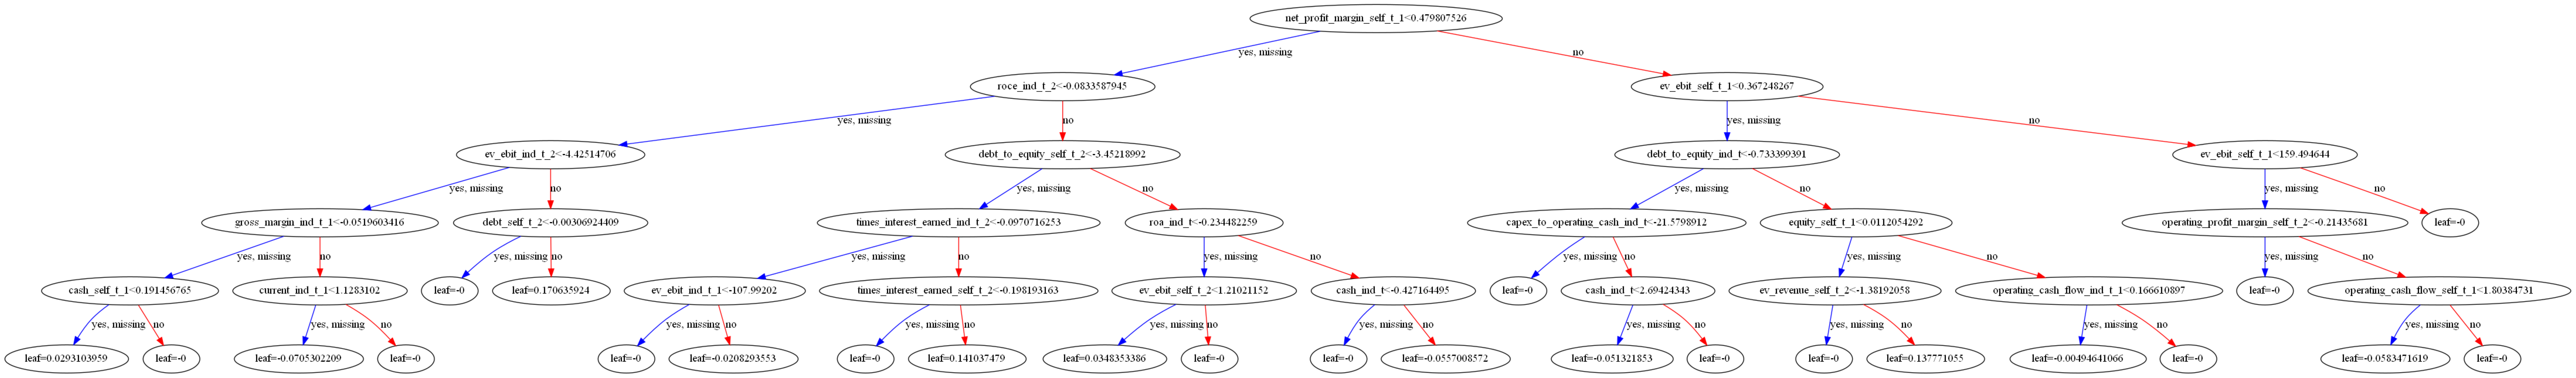

In [65]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plot_tree(xgboost_model,num_trees=0)
plt.rcParams['figure.figsize'] = [300, 200]
plt.show()

In [137]:
# The Gain is the most relevant attribute to interpret the relative importance of each feature.
"""
1. The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature's 
contribution for each tree in the model. A higher value of this metric when compared to another feature implies it 
is more important for generating a prediction.

2. The Cover metric means the relative number of observations related to this feature. For example, if you have 100 observations,
4 features and 3 trees, and suppose feature1 is used to decide the leaf node for 10, 5, and 2 observations in tree1, tree2 and tree3
respectively; then the metric will count cover for this feature as 10+5+2 = 17 observations. This will be calculated for all the 4 features
and the cover will be 17 expressed as a percentage for all features' cover metrics.

3. The Frequency (/'Frequence') is the percentage representing the relative number of times a particular feature occurs in the trees
of the model. In the above example, if feature1 occurred in 2 splits, 1 split and 3 splits in each of tree1, tree2 and tree3; then the
weightage for feature1 will be 2+1+3 = 6. The frequency for feature1 is calculated as its percentage weight over weights of all features.

"""
weight_scores = model_xgb_2.get_score(importance_type="weight")
gain_scores = model_xgb_2.get_score(importance_type="gain")
cover_scores = model_xgb_2.get_score(importance_type="cover")
# total_cover_scores = model_xgb_2.get_score(importance_type="total_cover")
# total_gain_scores = model_xgb_2.get_score(importance_type="total_gain")

weight_scores = {k: v for k, v in sorted(weight_scores.items(), key=lambda item: item[1], reverse=True)}
gain_scores = {k: v for k, v in sorted(gain_scores.items(), key=lambda item: item[1], reverse=True)}
cover_scores = {k: v for k, v in sorted(cover_scores.items(), key=lambda item: item[1], reverse=True)}
# total_cover_scores = {k: v for k, v in sorted(total_cover_scores.items(), key=lambda item: item[1], reverse=True)}
# total_gain_scores = {k: v for k, v in sorted(total_gain_scores.items(), key=lambda item: item[1], reverse=True)}

first_n = 20
print(list(weight_scores)[:first_n])
print(list(gain_scores)[:first_n])
print(list(cover_scores)[:first_n])
# print(list(total_cover_scores)[:first_n])
# print(list(total_gain_scores)[:first_n])

['roe_self_t_1', 'roa_self_t_1', 'gross_margin_self_t_1', 'roce_self_t_1', 'ev_revenue_self_t_2', 'ev_revenue_self_t_1', 'net_profit_margin_self_t_1', 'debt_to_equity_self_t_1', 'capex_to_operating_cash_self_t_1', 'operating_profit_margin_self_t_1', 'current_self_t_1', 'debt_self_t_1', 'roa_self_t_2', 'roce_self_t_2', 'ev_ebitda_self_t_1', 'equity_self_t_1', 'roe_ind_t', 'roce_ind_t_2', 'debt_to_equity_self_t_2', 'debt_to_equity_ind_t']
['roce_ind_t_2', 'debt_to_equity_ind_t', 'ev_revenue_self_t_2', 'ev_revenue_self_t_1', 'ev_ebit_ind_t_2', 'debt_to_equity_ind_t_2', 'price_to_earnings_ind_t_2', 'times_interest_earned_ind_t_2', 'roa_self_t_2', 'operating_profit_margin_ind_t_1', 'ev_revenue_ind_t_2', 'roce_self_t_2', 'roa_ind_t_2', 'operating_cash_flow_self_t_2', 'ev_revenue_ind_t_1', 'ev_ebit_ind_t', 'ev_ebitda_ind_t_2', 'filing_on_time_1', 'cash_ind_t', 'roa_ind_t']
['debt_to_equity_ind_t', 'ev_revenue_self_t_2', 'ev_revenue_self_t_1', 'cash_ind_t', 'net_profit_margin_ind_t_2', 'roce_i

In [ ]:
from xgboost import plot_importance

plot_importance(model_xgb_2, importance_type="gain", max_num_features=10)

In [188]:
import plotly.express as px
changed_names = [name.replace("_self", "").replace("_", '-').upper().replace("-T-", '_t-') for name in list(weight_scores.keys())]
fig = px.pie(values=list(weight_scores.values())[:10], names=changed_names[:10], title="Top 10 most important features") 
fig.show()
